In [1]:
import numpy as np
import pandas as pd

tasks = pd.read_csv('tasks.csv')
tasks.head()

,task_id,type,product,from loc,to loc,time,order,status
0,1,pick,p1,l1,l30,30,o1,available
1,2,put,p2,l31,l11,20,NaN,available
2,3,pick,p3,l3,l32,10,o2,available
3,4,pick,p4,l4,l30,5,o1,available
4,5,repl,p4,l5,l4,8,o1,available


In [2]:
# encode the df

# encode "type"
type_encoding = {
    "pick": 0,
    "put": 1,
    "load": 2,
    "repl": 3
}
tasks["type"] = tasks["type"].map(type_encoding)

tasks["product"] = tasks["product"].apply(lambda prod:  prod[1:]) # encode product
tasks["from loc"] = tasks["from loc"].apply(lambda loc:  loc[1:]) # encode from loc
tasks["to loc"] = tasks["to loc"].apply(lambda loc:  loc[1:]) # encode to loc

tasks.fillna({'order':'o0'}, inplace=True)  # encode to order
tasks["order"] = tasks["order"].apply(lambda order:  order[1:])


# encode status
status_encoding = {
    "available": 0,
    "active": 1,
    "done": 2,
}
tasks["status"] = tasks["status"].map(status_encoding)

task_list = tasks.to_numpy().tolist()
print(task_list)

tasks.head()



[[1, 0, '1', '1', '30', 30, '1', 0], [2, 1, '2', '31', '11', 20, '0', 0], [3, 0, '3', '3', '32', 10, '2', 0], [4, 0, '4', '4', '30', 5, '1', 0], [5, 3, '4', '5', '4', 8, '1', 0], [6, 0, '5', '6', '30', 10, '1', 0], [7, 3, '6', '7', '11', 11, '0', 0], [8, 0, '7', '8', '32', 14, '2', 0], [9, 2, '8', '30', '40', 9, '1', 0], [10, 2, '9', '32', '41', 10, '2', 0]]


,task_id,type,product,from loc,to loc,time,order,status
0,1,0,1,1,30,30,1,0
1,2,1,2,31,11,20,0,0
2,3,0,3,3,32,10,2,0
3,4,0,4,4,30,5,1,0
4,5,3,4,5,4,8,1,0


In [3]:
devices = pd.read_csv('devices.csv')
# devices.head()

# type encodings
type_encodings = {
    "forklift": 0,
    "pallet_jack": 1
}
devices["type"] = devices["type"].map(type_encodings)

# encode status
status_encoding = {
    "available": 0,
    "active": 1,
}
devices["status"] = devices["status"].map(status_encoding)

device_list = devices.to_numpy().tolist()
print(device_list)

devices.head(10)

[[1, 0, 0], [2, 0, 0], [3, 0, 0], [4, 0, 0], [5, 1, 0], [6, 1, 0]]


,device_id,type,status
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,1,0
5,6,1,0


In [4]:
from WarehouseEnv_V0 import WarehouseEnv

from stable_baselines3.common.env_checker import check_env

In [5]:
import gymnasium as gym

env = WarehouseEnv()

[encoding]: encoded task_list:  [[1, 0, 1, 1, 30, 30, 1, 0], [2, 1, 2, 31, 11, 20, 1, 0], [3, 0, 3, 3, 32, 10, 2, 0], [4, 0, 4, 4, 30, 5, 1, 0], [5, 3, 4, 5, 4, 8, 1, 0], [6, 0, 5, 6, 30, 10, 1, 0], [7, 3, 6, 7, 11, 11, 1, 0], [8, 0, 7, 8, 32, 14, 2, 0], [9, 2, 8, 30, 40, 9, 1, 0], [10, 2, 9, 32, 41, 10, 2, 0]]
[encoding]: encoded device_list:  [[1, 1, 0], [2, 1, 0], [3, 1, 0], [4, 1, 0], [5, 0, 0], [6, 0, 0]]


In [17]:
# print(task_list)
# print(env.observation_space['devices'])
# print(env.observation_space['tasks'])

tasks = env.observation_space['tasks']


next_state, reward = env.reset()

print("----")
print(next_state['tasks'])
tasks = next_state['tasks']


available_tasks = tasks[tasks[:, 7] == 0]
# env.action_space.n

[encoding]: encoded task_list:  [[1, 0, 1, 1, 30, 30, 1, 0], [2, 1, 2, 31, 11, 20, 1, 0], [3, 0, 3, 3, 32, 10, 2, 0], [4, 0, 4, 4, 30, 5, 1, 0], [5, 3, 4, 5, 4, 8, 1, 0], [6, 0, 5, 6, 30, 10, 1, 0], [7, 3, 6, 7, 11, 11, 1, 0], [8, 0, 7, 8, 32, 14, 2, 0], [9, 2, 8, 30, 40, 9, 1, 0], [10, 2, 9, 32, 41, 10, 2, 0]]
[encoding]: encoded device_list:  [[1, 1, 0], [2, 1, 0], [3, 1, 0], [4, 1, 0], [5, 0, 0], [6, 0, 0]]
----
[[ 1  0  1  1 30 30  1  0]
 [ 2  1  2 31 11 20  1  0]
 [ 3  0  3  3 32 10  2  0]
 [ 4  0  4  4 30  5  1  0]
 [ 5  3  4  5  4  8  1  0]
 [ 6  0  5  6 30 10  1  0]
 [ 7  3  6  7 11 11  1  0]
 [ 8  0  7  8 32 14  2  0]
 [ 9  2  8 30 40  9  1  0]
 [10  2  9 32 41 10  2  0]]


In [21]:
print(env.observation_space['devices'].shape)
env.action_space.n

(6, 3)


10

In [38]:
import random
(state,info) = env.reset()

tasks= state['tasks']

TASK_STATUS = 7
available_tasks = tasks[tasks[:, TASK_STATUS] == 0]
available_task_ids = [sublist[0] for sublist in available_tasks]

random_action = random.choice(available_task_ids)
print(random_action)

[encoding]: encoded task_list:  [[1, 0, 1, 1, 30, 30, 1, 0], [2, 1, 2, 31, 11, 20, 1, 0], [3, 0, 3, 3, 32, 10, 2, 0], [4, 0, 4, 4, 30, 5, 1, 0], [5, 3, 4, 5, 4, 8, 1, 0], [6, 0, 5, 6, 30, 10, 1, 0], [7, 3, 6, 7, 11, 11, 1, 0], [8, 0, 7, 8, 32, 14, 2, 0], [9, 2, 8, 30, 40, 9, 1, 0], [10, 2, 9, 32, 41, 10, 2, 0]]
[encoding]: encoded device_list:  [[1, 1, 0], [2, 1, 0], [3, 1, 0], [4, 1, 0], [5, 0, 0], [6, 0, 0]]
8


In [ ]:
env.sample()

{'tasks': array([[88,  1, 46, 88, 48, 52, 79,  1],
        [68,  3, 34, 31,  8, 30, 10,  2],
        [69,  1, 96, 65, 56, 42,  8,  2],
        [ 7,  1, 74, 65, 40, 19, 97,  2],
        [50,  3, 41, 12, 42, 58, 52,  1],
        [17,  2, 76, 19,  4, 22, 13,  1],
        [79,  2, 96, 23, 70, 16,  1,  1],
        [46,  0, 56, 95, 17, 52, 66,  0],
        [57,  3, 93, 38, 36, 49, 46,  0],
        [36,  0, 34, 87,  6, 38, 34,  0]]),
 'devices': array([[96,  1,  1],
        [79,  1,  0],
        [31,  1,  1],
        [67,  1,  1],
        [ 5,  1,  0],
        [85,  0,  0]])}

In [1]:
import tensorflow as tf

In [1]:
import pandas as pd
agents = pd.read_csv('agents.csv') 

agents.head()

,agent_id,type,status,reward,current_task,current_device
0,1,human,available,0,-1,-1
1,2,human,available,0,-1,-1


In [7]:
agent_id = 1
print(f"agent is a: {agents.query(f'agent_id == {agent_id}')['type'].iloc[0]}")

agent is a: human


In [5]:
for index, agent in agents.iterrows():
    agent['status'] = 0
    agents.loc[index, 'reward'] = 10
    print(agent)

agents.head()

agent_id              1
type              human
status                0
reward                0
current_task         -1
current_device       -1
Name: 0, dtype: object


,agent_id,type,status,reward,current_task,current_device
0,1,human,available,10,-1,-1


In [8]:
a = [1,4,2,6,8,3,5,7,9]
a.sort()
a

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [1]:
from keras.models import load_model
import gymnasium as gym

from WarehouseEnv_V0 import WarehouseEnv
env = WarehouseEnv()

state, info = env.reset()

tasks = state['tasks']
devices = state['devices']

print("============> tasks: \n",tasks)
print("============> devices: \n", devices)

obs = env.get_observation()
print(obs['tasks'])



[encoding]: encoded task_list:  [[1, 0, 1, 4, 13, 20, 1, 0], [2, 0, 2, 5, 14, 20, 2, 0], [3, 0, 3, 6, 15, 20, 1, 0], [4, 0, 4, 7, 13, 20, 1, 0], [5, 0, 5, 8, 14, 20, 2, 0], [6, 0, 6, 9, 15, 20, 3, 0], [7, 0, 7, 10, 13, 20, 1, 0], [8, 0, 8, 4, 14, 20, 2, 0], [9, 0, 9, 5, 15, 20, 3, 0], [10, 0, 3, 6, 13, 20, 1, 0], [11, 0, 1, 7, 14, 20, 2, 0], [12, 0, 5, 8, 15, 20, 3, 0], [13, 0, 6, 9, 13, 20, 1, 0], [14, 0, 4, 10, 14, 20, 2, 0], [15, 0, 5, 4, 15, 20, 3, 0], [16, 3, 6, 8, 9, 20, 3, 0], [17, 3, 11, 10, 11, 20, -1, 0], [18, 3, 6, 6, 9, 20, 3, 0], [19, 3, 13, 10, 7, 20, -1, 0], [20, 3, 3, 7, 6, 20, 1, 0], [21, 3, 15, 4, 11, 20, -1, 0], [22, 3, 3, 11, 6, 20, 1, 0], [23, 3, 5, 7, 8, 20, 2, 0], [24, 3, 5, 8, 5, 20, -1, 0], [25, 3, 6, 9, 5, 20, -1, 0], [26, 3, 3, 9, 6, 20, 1, 0], [27, 3, 6, 10, 5, 20, -1, 0], [28, 3, 7, 5, 10, 20, -1, 0], [29, 3, 5, 11, 8, 20, 2, 0], [30, 3, 9, 12, 4, 20, -1, 0], [31, 1, 15, 1, 4, 20, -1, 0], [32, 1, 14, 2, 5, 20, -1, 0], [33, 1, 13, 3, 6, 20, -1, 0], [34, 1, 1

d:\Ashan Personal\MSC AI Moratuwa Campus\My Research\MARL Based Warehouse Task Assignment - Implementation\WarehouseEnv_V0.py:322: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  shelf_locations = pd.concat([shelf_locations, self_location_rec], ignore_index=True)
d:\Ashan Personal\MSC AI Moratuwa Campus\My Research\MARL Based Warehouse Task Assignment - Implementation\WarehouseEnv_V0.py:524: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  shelf_locations = pd.concat([shelf_locations, self_location_r

In [5]:
obs = env.get_observation()
print(obs['tasks'])



[[1, 0, 1, 4, 13, 20, 1, 0], [2, 0, 2, 5, 14, 20, 2, 0], [3, 0, 3, 6, 15, 20, 1, 0], [4, 0, 4, 7, 13, 20, 1, 0], [5, 0, 5, 8, 14, 20, 2, 0], [6, 0, 6, 9, 15, 20, 3, 0], [7, 0, 7, 10, 13, 20, 1, 0], [8, 0, 8, 4, 14, 20, 2, 0], [9, 0, 9, 5, 15, 20, 3, 0], [10, 0, 3, 6, 13, 20, 1, 0], [11, 0, 1, 7, 14, 20, 2, 0], [12, 0, 5, 8, 15, 20, 3, 0], [13, 0, 6, 9, 13, 20, 1, 0], [14, 0, 4, 10, 14, 20, 2, 0], [15, 0, 5, 4, 15, 20, 3, 0], [16, 3, 6, 8, 9, 20, 3, 0], [17, 3, 11, 10, 11, 20, -1, 0], [18, 3, 6, 6, 9, 20, 3, 0], [19, 3, 13, 10, 7, 20, -1, 0], [20, 3, 3, 7, 6, 20, 1, 0], [21, 3, 15, 4, 11, 20, -1, 0], [22, 3, 3, 11, 6, 20, 1, 0], [23, 3, 5, 7, 8, 20, 2, 0], [24, 3, 5, 8, 5, 20, -1, 0], [25, 3, 6, 9, 5, 20, -1, 0], [26, 3, 3, 9, 6, 20, 1, 0], [27, 3, 6, 10, 5, 20, -1, 0], [28, 3, 7, 5, 10, 20, -1, 0], [29, 3, 5, 11, 8, 20, 2, 0], [30, 3, 9, 12, 4, 20, -1, 0], [31, 1, 15, 1, 4, 20, -1, 0], [32, 1, 14, 2, 5, 20, -1, 0], [33, 1, 13, 3, 6, 20, -1, 0], [34, 1, 12, 1, 7, 20, -1, 0], [35, 1, 11,

TypeError: 'Box' object is not subscriptable

In [12]:
import keras
model = keras.models.load_model('dqn_model.h5')


In [11]:
import numpy as np
data = [[10, 40, 70], [20, 50, 80], [30, 60, 90]]

print(data)
data = np.array(data, dtype=float)
print(data.shape[1])

for col_index in range(data.shape[1]):
    print(col_index)
    col = data[:, col_index]
    min_val = np.min(col)
    max_val = np.max(col)
    data[:, col_index] = (col - min_val) / (max_val - min_val)

print(data)

[[10, 40, 70], [20, 50, 80], [30, 60, 90]]
3
0
1
2
[[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]


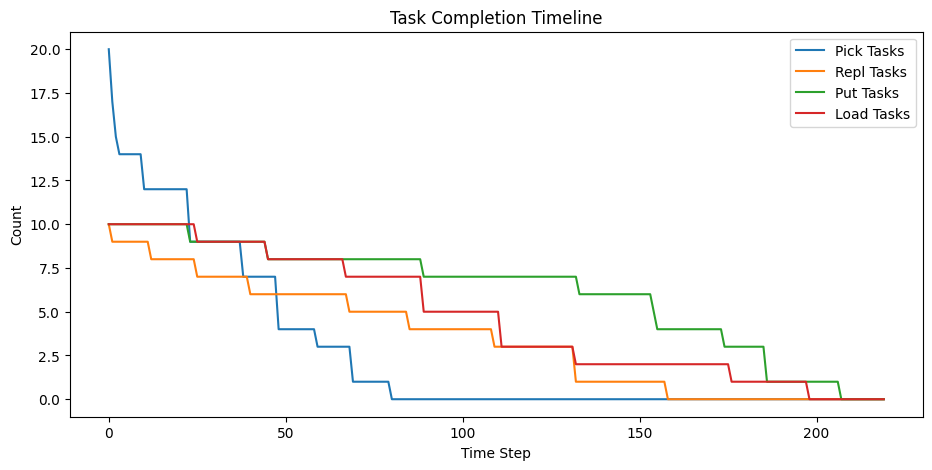

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

task_completion_records = pd.read_csv('task_completion_records.csv')

plt.figure(figsize=(11, 5))

plt.plot(task_completion_records["time_step"], task_completion_records["pick"], label="Pick Tasks")
plt.plot(task_completion_records["time_step"], task_completion_records["repl"], label="Repl Tasks")
plt.plot(task_completion_records["time_step"], task_completion_records["put"], label="Put Tasks")
plt.plot(task_completion_records["time_step"], task_completion_records["load"], label="Load Tasks")
plt.xlabel("Time Step")
plt.ylabel("Count")
plt.title("Task Completion Timeline")
plt.legend()

plt.show()

In [15]:
(1 - 88 / 239) 


0.6317991631799162